# In this notebook we are going to realize an exploratory data analysis (EDA)

## Open Steam Games Dataset

In [81]:
import pandas as pd
import ast
import numpy as np

fn_steamGames = 'APIData/df_steamGames.csv'
df_steamGames = pd.read_csv(fn_steamGames)
df_steamGames['release_date'] = pd.to_datetime(df_steamGames['release_date'])

Genres = []
genresSeries = df_steamGames['genres'].values
for g in genresSeries:
    try:
        Genres.append(ast.literal_eval(g))
    except:
        Genres.append(np.nan)

df_steamGames['genres'] = Genres

df_steamGames

,genres,app_name,release_date,price,id,developer
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,643980.0,Secret Level SRL
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,670290.0,Poolians.com
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
4,"[Action, Indie, Casual, Sports]",Log Challenge,2016-04-21,2.99,773570.0,NaN
...,...,...,...,...,...,...
32126,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
32127,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
32128,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich
32129,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns"


### Check for missing values

In [82]:
df_steamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        31993 non-null  object        
 1   app_name      32131 non-null  object        
 2   release_date  32131 non-null  datetime64[ns]
 3   price         32131 non-null  float64       
 4   id            32131 non-null  float64       
 5   developer     28899 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.5+ MB


In terms of missing values, the Steam Games Dataset is explained in the following way:

- `genres`: has 138 null entries, this will not significatively affect the project.
- `app_name`, `release_date`, `price` and `id`: complete.
- `developer`: has 3232, this can affect the project as it is almost 10% of the data, will try to imputate later.

### Descriptive Statistics

In [83]:
df_steamGames.describe(include='all')

,genres,app_name,release_date,price,id,developer
count,31993,32131,32131,32131.000000,3.213100e+04,28899
unique,2681,32094,NaN,NaN,NaN,11011
top,[Action],Soundtrack,NaN,NaN,NaN,Ubisoft - San Francisco
freq,1882,3,NaN,NaN,NaN,1259
mean,NaN,NaN,2015-05-19 11:47:17.670785280,8.819505,4.517566e+05,NaN
min,NaN,NaN,1970-07-15 00:00:00,0.000000,1.000000e+01,NaN
25%,NaN,NaN,2014-12-02 00:00:00,2.990000,3.292950e+05,NaN
50%,NaN,NaN,2016-04-21 00:00:00,4.990000,4.520600e+05,NaN
75%,NaN,NaN,2017-03-28 00:00:00,9.990000,5.933950e+05,NaN
max,NaN,NaN,2021-12-31 00:00:00,995.000000,2.028850e+06,NaN


In terms of descriptive statistics, the Steam Games Dataset can be explained in the following way:

- `genres`: The most interesting detail here is that there are only 2681 unique values, and values in this column is taken as the whole array with different genres. Meaning there are a lot of games described by the same order of categories.
- `app_name`: The interesting fact about this column is that there are 37 repeated values,  but there are no duplicated values in the dataframe, hence, we need to check.
- `release_date`: Very interesting to see the minimum date is in 1970 and maximum is in 2021
- `price`: This column definitively has outliers, the mean and third quartile are less than 10, and maximum value is 995.
- `id`: For now, there is not much we can tell about this column.
- `developer`: It is expected to have Ubisoft as the most frequent game developer.

#### Check repetitions in `app_name` column

In [84]:
df_steamGames[df_steamGames[['app_name','id']].duplicated(keep=False)]

,genres,app_name,release_date,price,id,developer


They games with repeated names have different ids, hence, they cannot be eliminated.

### Univariate Analysis Plots

#### Price Column

Text(0.5, 0, 'Price')

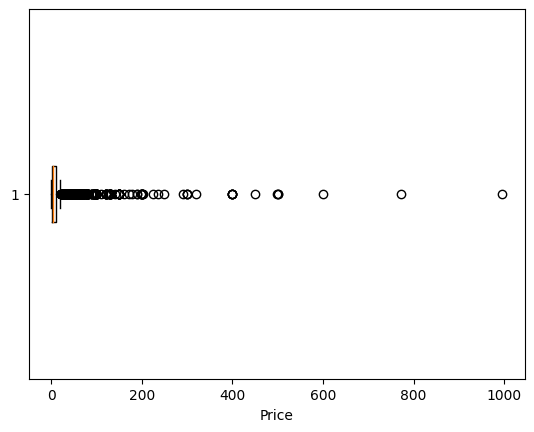

In [85]:
import matplotlib.pyplot as plt
plt.boxplot(df_steamGames['price'],vert=False)
plt.xlabel('Price')

Note that there are more outliers than expected.

#### Date Column

##### By year

Text(0.5, 0, 'Year')

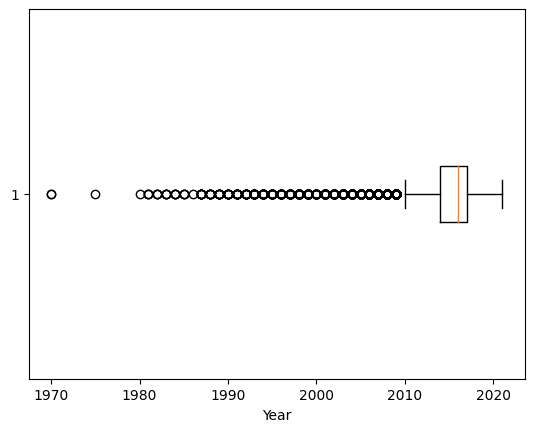

In [86]:
plt.boxplot(df_steamGames['release_date'].dt.year.values,vert=False)
plt.xlabel('Year')

There are also a lot of outliers in the release years. Lots of old games.

##### By month

Text(0.5, 0, 'Month')

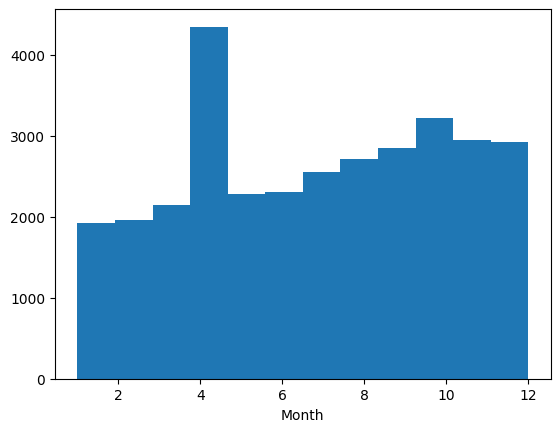

In [87]:
plt.hist(df_steamGames['release_date'].dt.month.values,bins=12)
plt.xlabel('Month')

Game releases increase gradually throught the year, but there is an unexpected peak in April.

### Check if there is a relation between release date and price

Text(0, 0.5, 'Price')

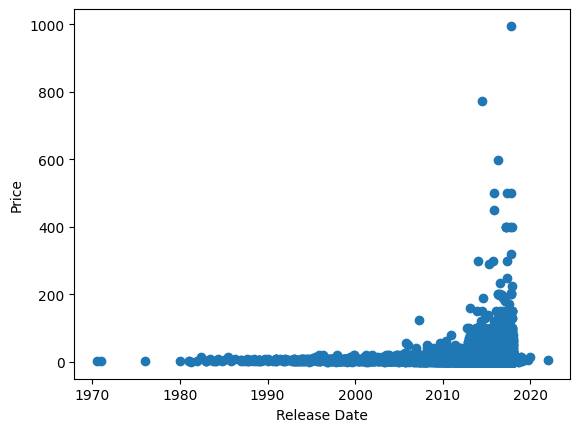

In [88]:
plt.scatter(df_steamGames['release_date'],df_steamGames['price'])
plt.xlabel('Release Date')
plt.ylabel('Price')

It does not have a very clear correlation but it is obvious that the priciest games were released in the latest years.

### Genre column

Count individual genres

In [149]:
genreCount = {}
for genres in df_steamGames['genres']:
    try:
        n = len(genres)
        for g in range(n):
            if genres[g] not in genreCount.keys():
                genreCount[genres[g]] = 1
            else:
                genreCount[genres[g]] += 1
    except:
        pass

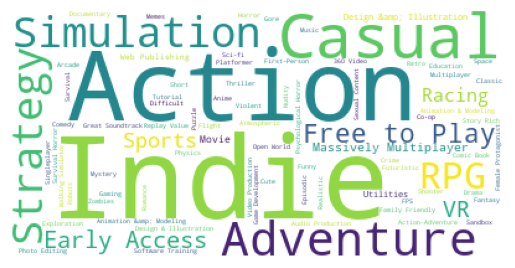

In [160]:
from wordcloud import WordCloud
plt.imshow(WordCloud(background_color='white').generate_from_frequencies(genreCount))
plt.axis('off')
plt.show()

### Developer Column

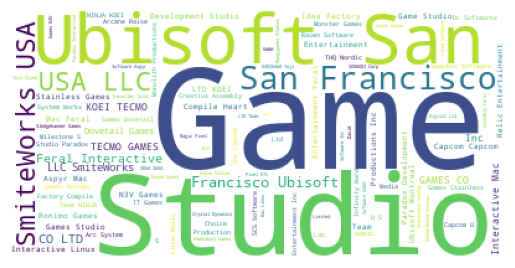

In [164]:
text = " ".join(dev for dev in df_steamGames[df_steamGames['developer'].notna()].developer)
plt.imshow(WordCloud(background_color='white').generate(text))
plt.axis('off')
plt.show()

### App Name Column

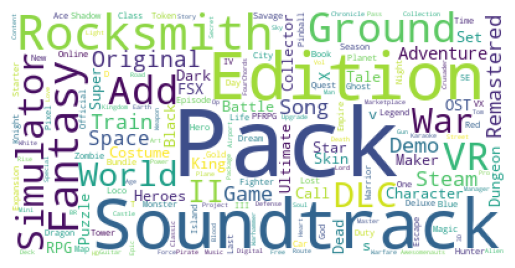

In [167]:
text = " ".join(name for name in df_steamGames.app_name)
plt.imshow(WordCloud(collocations=False,background_color='white').generate(text))
plt.axis('off')
plt.show()